# Import Packages

In [91]:
#general
import pandas as pd 
from cycler import cycler
import json
import numpy as np
import warnings
import pickle
from pprint import pprint
from datetime import date
import tqdm
from tqdm import tqdm
from itertools import cycle
from array import array
from sklearn import preprocessing
from scipy import stats

#for plotting
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
from lifelines import KaplanMeierFitter
from plotly import __version__
import plotly.io as pio
import plotly.offline as ply
ply.init_notebook_mode(connected=True)
pio.renderers.default = "browser"  # Switch to browser renderer
import seaborn as sb 
from matplotlib.colors import ListedColormap
from matplotlib.ticker import ScalarFormatter



#for OpenAlex
import pyalex
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
from itertools import chain

#for Gender Guesser
from urllib.request import urlopen
import gender_guesser.detector as gender
import pycountry
import re

#for Geo things
import mapclassify
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon
from geotext import GeoText

#for topic model
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.stem.porter import *

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim import corpora, models
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel

from wordcloud import WordCloud
import scipy.interpolate.interpnd
import pyLDAvis
import pyLDAvis.gensim

#for ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV



In [33]:
#unwanted warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [34]:
#downloads 
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Color Codes 

In [61]:
color1='#EEB2E1' #female
color2='#E78AD7' #general plotting
color3='#E1478E'
color4='#B53785' 
color5='#7F4B97' #andy2
color6='#4D9DCF' 
color7='#68CAE2' 
color8='#74AAA0' 
color9='#96B77E' #positive
color10='#B8B6CF' #research domain
color11='#6B6C7E' 
color12='#1D0D1C' #unkown1
color13='#6B1E41' #male
color14='#8F2357' #negative
color15='#C4767F' #andy1
color16='#BC8764' #unknown 2
color17='#F6DF4F'
color18='#E09235' #education domain

In [62]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the custom colormap
custom_colors = [color1, color2, color3, color4, color5, color6, color7, color8, color9, color10, color11, color12, color13, color14, color15, color16, color17, color18]
custom_cmap = ListedColormap(custom_colors)



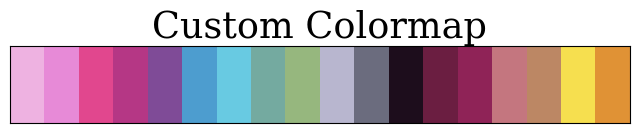

In [63]:
# Plot a colorbar to visualize the custom colormap
plt.figure(figsize=(8, 1))
plt.imshow([list(range(18))], cmap=custom_cmap, aspect='auto')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.title('Custom Colormap')
plt.show()


In [78]:
#plotting parameters
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.prop_cycle'] = cycler(color=custom_colors)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "serif"


font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


KeyError: 'patch.alpha is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

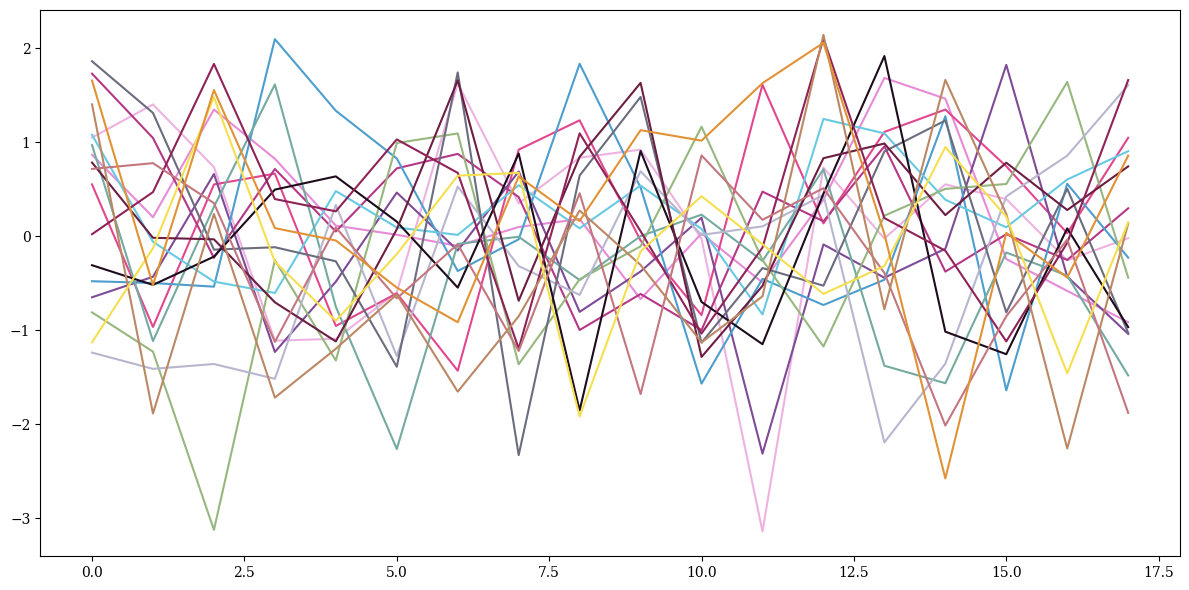

In [79]:
np.random.seed(19680801)
data = np.random.randn(18, 18)
plt.plot(data)
plt.show()

# Functions 

In [73]:

def plot_pie_chart(df, column_name, title=None, color1=color1, color2=color2, save_name=None):
    # Calculate value counts
    value_counts = df[column_name].value_counts()

    # Create labels for the pie chart
    labels = value_counts.index

    # Create sizes for the pie chart
    sizes = value_counts.values

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=80, colors=[color1, color2])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(title)

    # Change the color of autopct text
    for autotext in autotexts:
        autotext.set_color('white')

    if save_name:
        save_name = save_name
        save_path = f'Plots/{date.today()}/{save_name}'
        plt.savefig(save_path)

    plt.show()


In [69]:
def cat_plot(data, color=color2, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, ymargins=None, save_name=None):
    """
    Create a categorical plot for a given DataFrame column.

    Parameters:
    - data (pd.Series): The input DataFrame column.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequency.
    - norm (bool): Whether to normalize data or not. Default is False.
    - multiply (int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot (int): Rotation scale of x-tick-labels. Default is 0.
    - font (str): Font type. If Chinese letters, use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.
    - save_name (str): The name to use when saving the plot.

    Returns:
    - None
    """
    # count the number and/or percentage within each category
    value_counts = data.value_counts(normalize=norm).mul(multiply).reset_index()
    count_n = data.value_counts().reset_index()
    count_n = count_n.iloc[:, 1]
    count = value_counts.iloc[:, 1]
    cats = value_counts.iloc[:, 0]

    fig, ax = plt.subplots()
    bars = ax.bar(cats, count, width=0.8, alpha=0.6, color=color, edgecolor='white', label='Histogram of Data')

    # Add text on top of each bar if the number of bars is 5 or less
    if len(bars) <= 10:
        for i, bar in enumerate(bars):
            height = bar.get_height()
            count_sci = "{:.1e}".format(float(count_n.iloc[i]))  # Format count in scientific notation
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count_sci}', ha='center', va='bottom', color='black', fontsize=12)

    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories
    for cat, c in zip(cats, count):
        if len(cats) <=10 and c >= 2:
            ax.text(cat, c / 2, f'{c:.1f}%', ha='center', va='center', color='white', fontsize=12)

    plt.xticks(cats, font=font, size=12, rotation=rot)
    plt.margins(x=xmargins, y=ymargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if save_name:
        save_name = save_name
        save_path = f'Plots/{date.today()}/{save_name}{data.name}'
        plt.savefig(save_path)

    plt.show()


In [89]:
def cat_plot_reversed_order(data, color=color2, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, ymargins=None, save_name=None):
    """
    Create a categorical plot for a given DataFrame column.

    Parameters:
    - data (pd.Series): The input DataFrame column.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequency.
    - norm (bool): Whether to normalize data or not. Default is False.
    - multiply (int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot (int): Rotation scale of x-tick-labels. Default is 0.
    - font (str): Font type. If Chinese letters, use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.
    - save_name (str): The name to use when saving the plot.

    Returns:
    - None
    """
    # count the number and/or percentage within each category
    value_counts = data.value_counts(normalize=norm).mul(multiply).reset_index()
    count_n = data.value_counts().reset_index()
    count_n = count_n.iloc[:, 1]
    print(type(count_n))
    count = value_counts.iloc[:, 1]
    cats = value_counts.iloc[:, 0]


    cats_reversed = list(reversed(cats))
    count_reversed = list(reversed(count))
    count_n_reversed = list(reversed(count_n))
    count_n_reversed = pd.Series(count_n_reversed)

        
    fig, ax = plt.subplots()
    bars = ax.bar(cats_reversed, count_reversed, width=0.8, alpha=0.6, color=color, edgecolor='white', label='Histogram of Data')

    # Add text on top of each bar if the number of bars is 5 or less
    if len(bars) <= 10:
        for i, bar in enumerate(bars):
            height = bar.get_height()
            count_sci = "{:.1e}".format(float(count_n_reversed.iloc[i]))  # Format count in scientific notation
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count_sci}', ha='center', va='bottom', color='black', fontsize=12)

    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories
    for cat, c in zip(cats_reversed, count_reversed):
        if len(cats_reversed) <=10 and c >= 2:
            ax.text(cat, c / 2, f'{c:.1f}%', ha='center', va='center', color='white', fontsize=12)

    plt.xticks(cats_reversed, font=font, size=12, rotation=rot)
    plt.margins(x=xmargins, y=ymargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if save_name:
        save_name = save_name
        save_path = f'Plots/{date.today()}/{save_name}{data.name}'
        plt.savefig(save_path)

    plt.show()


In [72]:

def cat_plot_compare(data1, data2, color1=None, color2=None, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, ymargins=None, save_name=None, label1='Dataset 1', label2='Dataset 2', legend_loc='best'):
    """
    Create a categorical plot for given DataFrame columns for comparison.

    Parameters:
    - data1 (pd.Series): The first input DataFrame column.
    - data2 (pd.Series): The second input DataFrame column.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequency.
    - norm (bool): Whether to normalize data or not. Default is False.
    - multiply (int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot (int): Rotation scale of x-tick-labels. Default is 0.
    - font (str): Font type. If Chinese letters then use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.
    - save_name (str): The name to use when saving the plot.
    - label1 (str): Label for Dataset 1. Default is 'Dataset 1'.
    - label2 (str): Label for Dataset 2. Default is 'Dataset 2'.

    Returns:
    - None
    """
    # Merge data1 and data2 to ensure all categories are represented
    merged_data = pd.merge(data1, data2, how='outer', left_index=True, right_index=True, suffixes=('_df1', '_df2'))

    #count N without turning into percentage in both dataframes 
    count_n1 = merged_data[data1.name + '_df1'].value_counts().reset_index()
    count_n2 = merged_data[data2.name + '_df2'].value_counts().reset_index()

    # get value counts with the parameter normalize in order to be able to get percentage of both dataframes
    value_counts1 = merged_data[data1.name + '_df1'].value_counts(normalize=norm).mul(multiply).reset_index()
    value_counts2 = merged_data[data2.name + '_df2'].value_counts(normalize=norm).mul(multiply).reset_index()

    # Sort the value counts by category
    all_categories = set(value_counts1[data1.name + '_df1']).union(set(value_counts2[data2.name + '_df2']))
    value_counts1 = value_counts1.set_index(data1.name + '_df1').reindex(all_categories, fill_value=0).reset_index()
    count_n1 = count_n1.set_index(data1.name + '_df1').reindex(all_categories, fill_value=0).reset_index()
    value_counts2 = value_counts2.set_index(data2.name + '_df2').reindex(all_categories, fill_value=0).reset_index()
    count_n2 = count_n2.set_index(data2.name + '_df2').reindex(all_categories, fill_value=0).reset_index()

    #select either count or category column 
    count_n1 = count_n1.iloc[:, 1]
    count1 = value_counts1.iloc[:, 1]
    cats1 = value_counts1.iloc[:, 0]

    count2 = value_counts2.iloc[:, 1]
    count_n2 = count_n2.iloc[:, 1]
    cats2 = value_counts2.iloc[:, 0]

    width = 0.4  # width of the bars

    # Get integer positions for each category
    cat_positions1 = range(len(cats1))
    cat_positions2 = [pos + width + 0.01 for pos in cat_positions1]

    fig, ax = plt.subplots()
    bars1=ax.bar(cat_positions1, count1, width, alpha=0.6, color=color1, edgecolor='white', label=label1)
    bars2=ax.bar(cat_positions2, count2, width, alpha=0.6, color=color2, edgecolor='white', label=label2)

    # Add text on top of each bar if the number of bars is 10 or less for both datasets and count is more than zero 
    if len(bars1) <= 10:
        for i, bar in enumerate(bars1):
            height = bar.get_height()
            if count_n1.iloc[i] > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count_n1.iloc[i]:.1e}', ha='center', va='bottom', color='black', fontsize=11)

    if len(bars2) <= 10:
        for i, bar in enumerate(bars2):
            height = bar.get_height()
            if count_n2.iloc[i] > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count_n2.iloc[i]:.1e}', ha='center', va='bottom', color='black', fontsize=11)


    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories for both datasets
    for cat, c1, c2, bar1, bar2 in zip(all_categories, count1, count2, bars1, bars2):
        if len(cat) <= 10 and c1 >= 2:
            percentbar1 = c1
            ax.text(bar1.get_x() + bar1.get_width() / 2, c1 / 2, f'{percentbar1:.1f}%', ha='center', va='center', color='white', fontsize=12)
        if len(cat) <= 10 and c2 >= 2:
            percentbar2 = c2
            ax.text(bar2.get_x() + bar2.get_width() / 2, c2 / 2, f'{percentbar2:.1f}%', ha='center', va='center', color='white', fontsize=12)

    plt.xticks([pos + width / 2 for pos in cat_positions1], cats1, font=font, size=10, rotation=rot)
    plt.margins(x=xmargins, y=ymargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)

    if save_name:
        save_path = f'Plots/{date.today()}/{str(save_name)}'
        plt.savefig(save_path)


    plt.show()

In [ ]:
short_names = []
full_names = []


In [3]:

def average_plot(avg, err, title=None, xlabel=None, ylabel=None, rot=0, full_names=full_names, short_names=short_names, add_means=False):
        # Create figure
        fig, ax = plt.subplots(figsize=(16,6))

        # Create short versions of names for x-ticks
        full_names = full_names
        short_names = short_names 

        #create legend labels
        legend_labels = [f'{short_names[i]}: {full_names[i]}' for i in range(len(full_names))]
        
        # X values are measurement number
        x = np.arange(len(avg))+1
        
        # Plot values and errorbars
        ax.scatter(x, avg, label=legend_labels)
        ax.errorbar(x, avg, err, fmt='o', color=purd_colors[8], ecolor=purd_colors[5], elinewidth=1, capsize=2, capthick=1)
        
        #Plot the weighted average line
        ax.hlines(avg.mean(), 0, len(x)+0.5, colors = purd_colors[5], linestyle = 'dashed')
        #plot extra average lines 
        if add_means:
                ax.hlines(avg_cites_domain.author_mean_cites.loc[0], 0, len(avg_cites_topics)+0.5, colors = purd_colors[9], linestyle = 'dashed')
                ax.text(-1.2, avg_cites_domain.author_mean_cites.loc[0]+5, 'Avg Research', color=purd_colors[9], size=8)
                ax.hlines(avg_cites_domain.author_mean_cites.loc[1], 0, len(avg_cites_topics)+0.5, colors = purd_colors[1], linestyle = 'dashed')
                ax.text(-1.2, avg_cites_domain.author_mean_cites.loc[1]-9, 'Avg Review', color=purd_colors[1], size=8)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xticks(np.arange(1,len(avg)+1, 1))
        ax.set_xticklabels(short_names, size=10, rotation=rot)
        # Add legend manually without any handles
        # Create legend handles
        legend_handles = [(plt.Line2D([], [], color=purd_colors[8], marker="o", linewidth=0)) for x in legend_labels]
        # Manually create legend with handles and labels
        plt.legend(handles=legend_handles, labels=legend_labels, fontsize=10, loc='center right', bbox_to_anchor=(1.5, 0.5))
        ax.margins(x=0.1, y=0.1)
        fig.tight_layout()
        plt.show()

In [97]:

def cat_plot_compare_short_names(data1, data2, data3, color1=color1, color2=color2, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, ymargins=None, save_name=None, label1='Dataset 1', label2='Dataset 2'):
    """
    Create a categorical plot for given DataFrame columns for comparison.

    Parameters:
    - data1 (pd.Series): The first input DataFrame column.
    - data2 (pd.Series): The second input DataFrame column.
    - data3 (pd.Seris): Full label for name to print in legend. 
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequency.
    - norm (bool): Whether to normalize data or not. Default is False.
    - multiply (int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot (int): Rotation scale of x-tick-labels. Default is 0.
    - font (str): Font type. If Chinese letters then use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.
    - save_name (str): The name to use when saving the plot.
    - label1 (str): Label for Dataset 1. Default is 'Dataset 1'.
    - label2 (str): Label for Dataset 2. Default is 'Dataset 2'.

    Returns:
    - None
    """
    # Merge data1 and data2 to ensure all categories are represented
    merged_data = pd.merge(data1, data2,how='outer', left_index=True, right_index=True, suffixes=('_df1', '_df2'))

    #count N without turning into percentage in both dataframes 
    count_n1 = merged_data[data1.name + '_df1'].value_counts().reset_index()
    count_n2 = merged_data[data2.name + '_df2'].value_counts().reset_index()

    # get value counts with the parameter normalize in order to be able to get percentage of both dataframes
    value_counts1 = merged_data[data1.name + '_df1'].value_counts(normalize=norm).mul(multiply).reset_index()
    value_counts2 = merged_data[data2.name + '_df2'].value_counts(normalize=norm).mul(multiply).reset_index()

    # Sort the value counts by category
    all_categories = set(value_counts1[data1.name + '_df1']).union(set(value_counts2[data2.name + '_df2']))
    value_counts1 = value_counts1.set_index(data1.name + '_df1').reindex(all_categories, fill_value=0).reset_index()
    count_n1 = count_n1.set_index(data1.name + '_df1').reindex(all_categories, fill_value=0).reset_index()
    value_counts2 = value_counts2.set_index(data2.name + '_df2').reindex(all_categories, fill_value=0).reset_index()
    count_n2 = count_n2.set_index(data2.name + '_df2').reindex(all_categories, fill_value=0).reset_index()
    
    #select either count or category column 
    count_n1 = count_n1.iloc[:, 1]
    count1 = value_counts1.iloc[:, 1]
    cats1 = value_counts1.iloc[:, 0]

    count2 = value_counts2.iloc[:, 1]
    count_n2 = count_n2.iloc[:, 1]
    cats2 = value_counts2.iloc[:, 0]

    width = 0.4  # width of the bars

    # Get integer positions for each category
    cat_positions1 = range(len(cats1))
    cat_positions2 = [pos + width + 0.01 for pos in cat_positions1]

    #define colors
    # Get the PuRd colormap
    #cmap = plt.get_cmap('PuRd')
    #num_colors = 10  # Number of colors
    # Create a list of colors from the colormap
    #purd_colors = [cmap(i / num_colors) for i in range(num_colors)]
    #color1=purd_colors[5]
    #color2=purd_colors[3]

    fig, ax = plt.subplots(figsize=(20,8))
    bars1=ax.bar(cat_positions1, count1, width, alpha=0.6, color=color1, edgecolor='white', label=label1)
    bars2=ax.bar(cat_positions2, count2, width, alpha=0.6, color=color2, edgecolor='white', label=label2)

    # Add text on top of each bar if the number of bars is 10 or less for both datasets and count is more than zero 
    if len(bars1) <= 10:
        for i, bar in enumerate(bars1):
            height = bar.get_height()
            if count_n1.iloc[i] > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height, f'N={count_n1.iloc[i]}', ha='center', va='bottom', color='black', fontsize=12)

    if len(bars2) <= 10:
        for i, bar in enumerate(bars2):
            height = bar.get_height()
            if count_n2.iloc[i] > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height, f'N={count_n2.iloc[i]}', ha='center', va='bottom', color='black', fontsize=12)


    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories for both datasets
    for cat, c1, c2, bar1, bar2 in zip(all_categories, count1, count2, bars1, bars2):
        if len(cats1) <= 10 and c1 >= 2:
            percentbar1 = c1
            ax.text(bar1.get_x() + bar1.get_width() / 2, c1 / 2, f'{percentbar1:.1f}%', ha='center', va='center', color='white', fontsize=12)
        if len(cats2) <= 10 and c2 >= 2:
            percentbar2 = c2
            ax.text(bar2.get_x() + bar2.get_width() / 2, c2 / 2, f'{percentbar2:.1f}%', ha='center', va='center', color='white', fontsize=12)

    plt.xticks([pos + width / 2 for pos in cat_positions1], cats1, font=font, size=10, rotation=rot)
    #ax.set_xticklabels(cats1, size=10, rotation=rot)
    plt.margins(x=xmargins, y=ymargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #add extra legend 
    #get label to match with cats index
    cats1_df=pd.DataFrame(cats1)
    merge_labels=pd.merge(cats1_df, data3, left_on='topic_index_df1', right_on='topic_index')
    #crate manual labels 
    manual_legend_labels = [f'{merge_labels.topic_index[i]}: {merge_labels.topic_label[i]}' for i in range(len(merge_labels))]
    # Create legend handles
    manual_legend_handles = [(plt.Line2D([], [], marker=None, linewidth=0)) for x in manual_legend_labels]
    #create twin axis for double legend 
    ax2 = ax.twinx()
    ax2.plot(np.NaN, np.NaN)
    ax2.get_yaxis().set_visible(False)
    ax.legend()
    # Manually create legend with handles and labels
    ax2.legend(handles=manual_legend_handles, labels=manual_legend_labels, fontsize=10, loc='center right', bbox_to_anchor=(1.3, 0.5), handlelength=0)
    #auto_legend=
    #ax.add_artist(auto_legend)
    #ax.add_artist(manual_legend)
    save_path = f'Plots/{date.today()}/{str(save_name)}'
    plt.savefig(save_path)

    plt.show()


In [5]:
def cat_top_plot(data, top_n=10, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, ymargins=None, save_name=None):
    """
    Create a categorical plot for a given DataFrame column.

    Parameters:
    - data (pd.DataFrame): The input DataFrame column.
    - top_n (int): The number of top categories to display. Default is 10.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequncy.
    - norm(True/False): Whether to normalize data or not. Default is False.
    - multiply(int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot(int): Rotation scale of x-tick-labels. Default is 0.
    - font(str): Font type. If Chinese letters, use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.

    Returns:
    - None
    """
    
    # count the number and/or percentage within each category and set the top categories that you would want
    top_n = top_n
    value_counts = data.value_counts(normalize=norm).mul(multiply).reset_index()[0:top_n]
    count_n = data.value_counts().reset_index()
    count_n = count_n.iloc[:, 1]
    count = value_counts.iloc[:, 1]
    cats = value_counts.iloc[:, 0]

    # Create plot
    fig, ax = plt.subplots()
    bars = ax.bar(cats, count, width=0.8, alpha=0.6, edgecolor='white', label='Histogram of Data')

    # Add text on top of each bar if the number of bars is 5 or less
    if len(bars) <= 10:
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'N={count_n.iloc[i]}', ha='center', va='bottom', color='black', fontsize=12)

    # Add text in the center of each bar if the bar percentage count is 2 percent or more
    for cat, c in zip(cats, count):
        if len(cat) <=10 and c >= 2:
            ax.text(cat, c / 2, f'{c:.1f}%', ha='center', va='center', color='white', fontsize=12)

    plt.xticks(cats, font=font, size=10, rotation=rot)
    plt.margins(x=xmargins, y=ymargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}{data.name}'
    plt.savefig(save_path)

    plt.show()


In [94]:
def cat_top_plot_short_names(data, top_n=10, title=None, xlabel=None, ylabel='Frequency', log=False, norm=False, multiply=1, font=None, rot=0, xmargins=None, save_name=None, legend_labels=None, short_names=short_names):
    """
    Create a categorical plot for a given DataFrame column.

    Parameters:
    - data (pd.DataFrame): The input DataFrame column.
    - top_n (int): The number of top categories to display. Default is 10.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequncy.
    - norm(True/False): Whether to normalize data or not. Default is False.
    - multiply(int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot(int): Rotation scale of x-tick-labels. Default is 0.
    - font(str): Font type. If Chinese letters, use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.

    Returns:
    - None
    """
    
    # count the number and/or percentage within each category and set the top categories that you would want
    top_n = top_n
    value_counts = data.value_counts(normalize=norm).mul(multiply).reset_index()[0:top_n]
    count_n = data.value_counts().reset_index()
    count_n = count_n.iloc[:, 1]
    count = value_counts.iloc[:, 1]
    cats = value_counts.iloc[:, 0]

    # Create short versions of journal names for x-ticks
    short_names = short_names

    #create legend labels
    if legend_labels is None:
        legend_labels = [f'{short_names[i]}: {cats[i]}' for i in range(len(cats))]

    #create colors 
    num_colors = len(short_names)+3
    cmap = plt.get_cmap('PuRd')
    purd_colors = [cmap(i / num_colors) for i in range(num_colors)]

    # Create plot
    fig, ax = plt.subplots()
    bars = ax.bar(short_names, count, log=log, width=0.8, alpha=0.6, edgecolor='white',color=purd_colors[3::], label=legend_labels)

    # Add text on top of each bar if the number of bars is 5 or less
    if len(bars) <= 5:
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'N={count_n.iloc[i]}', ha='center', va='bottom', color='black', fontsize=12)

    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories
    for cat, short_name, c in zip(cats, short_names, count):
        if top_n <= 10 and c >= 2:
            ax.text(short_name, c / 2, f'{c:.1f}%', ha='center', va='center', color='white', fontsize=12)

    plt.xticks(short_names, font=font, size=10, rotation=rot)
    plt.margins(x=xmargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=None, fontsize=8, loc="upper right")

    if save_name:
        save_path = f'Plots/{date.today()}/{save_name}{data.name}'
        plt.savefig(save_path)

    plt.show()

In [95]:

def cat_value_top_plot_short_names(data, sort_col='column', top_n=10, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, save_name=None, legend_labels=None, short_names=short_names):
    """
    Create a categorical plot for a given DataFrame column.

    Parameters:
    - data (pd.DataFrame): The input DataFrame column.
    - top_n (int): The number of top categories to display. Default is 10.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequncy.
    - norm(True/False): Whether to normalize data or not. Default is False.
    - multiply(int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot(int): Rotation scale of x-tick-labels. Default is 0.
    - font(str): Font type. If Chinese letters, use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.

    Returns:
    - None
    """
    
    # count the number and/or percentage within each category and set the top categories that you would want
    top_n = top_n
    #sort values to be the top 
    data=data.sort_values(by=sort_col, ascending=False)
    #value_counts = data.value_counts(normalize=norm).mul(multiply).reset_index()[0:top_n]
    #count_n = data.value_counts().reset_index()
    #count_n = count_n.iloc[:, 1]
    #count = value_counts.iloc[:, 1]
    cats = data.iloc[:, 0][0:top_n]
    count= data.iloc[:, 1][0:top_n]

    # Create short versions of journal names for x-ticks
    short_names = short_names

    #create legend labels
    if legend_labels is None:
        legend_labels = [f'{short_names[i]}: {cats[i]}' for i in range(len(cats))]

    #create colors 
    num_colors = len(short_names)+3
    cmap = custom_cmap
    purd_colors = [cmap(i / num_colors) for i in range(num_colors)]

    # Create plot
    fig, ax = plt.subplots()
    bars = ax.bar(short_names, count, width=0.8, alpha=0.6, edgecolor='white',color=purd_colors[:], label=legend_labels)

    # Add text on top of each bar if the number of bars is 5 or less
    if len(bars) <= 5:
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'N={count_n.iloc[i]}', ha='center', va='bottom', color='black', fontsize=12)

    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories
    for cat, short_name, c in zip(cats, short_names, count):
        if top_n <= 10 and c >= 2:
            ax.text(short_name, c / 2, f'{c:.1f}', ha='center', va='center', color='white', fontsize=12)

    plt.xticks(short_names, font=font, size=10, rotation=rot)
    plt.margins(x=xmargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=None, fontsize=8, loc="upper right")

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)

    plt.show()


In [8]:
def Sturges_bins(data):
    
    """
    INPUT:
    data = 1d array of all data
    
    OUTPUT:
    k = number of bins to use
    """
    
    # Number of data
    N = len(data)
    
    # Number of bins
    k = int( np.ceil( np.log2(N) ) + 1 )
    
    return k

In [88]:
def hist_plot(data, color_list=custom_colors, N_bins=None, log=False, title=None, xlabel=None, ylabel='Frequency', xmargins=None, save_name=None, legend_labels=None, disp_legend=True, alpha_list=None):
    """
    Create a histogram for given DataFrame columns.

    Parameters:
    - data (List[pd.Series]): List of input DataFrame columns.
    - log (True/False): Plot on log scale. Default is False.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel (str): The label for the y-axis. Default is 'Frequency'.
    - xmargins (int): The size of the x-margins. Default is None.
    - save_name (str): The name to use when saving the plot.
    - legend_labels (List[str]): List of legend labels for each dataset. Default is None.
    - alpha_list (List[float]): List of alpha values for each dataset. Default is None.
    
    Returns:
    - None
    """

    fig, ax = plt.subplots()

    colors = color_list

    if legend_labels is None:
        legend_labels = [f'Data {i + 1}' for i in range(len(data))]

    if alpha_list is None:
        alpha_list = [1.0] * len(data)

    for i, (column_data, legend_label, color, alpha) in enumerate(zip(data, legend_labels, colors, alpha_list)):
        # Extract values from histogram and outline data
        if N_bins is None:
            N_bins = Sturges_bins(data[0])
        counts, bin_edges, _ = ax.hist(column_data, bins=N_bins, log=log, color=color, edgecolor='white', label=legend_label, alpha=alpha)
        bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
        binwidth = bin_edges[1] - bin_edges[0]

        # Poisson errors on the count in each bin
        s_counts = np.sqrt(counts)

        # We remove any bins, which don't have any counts in them:
        x = bin_centers[counts > 0]
        y = counts[counts > 0]
        sy = s_counts[counts > 0]

        # Plot data with error
        ax.errorbar(x, y, yerr=sy, fmt='.', color='k', ecolor='k', elinewidth=1, capsize=1, capthick=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(x=xmargins)

    if disp_legend is True:
        ax.legend()

    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)

    plt.show()


In [93]:

def stacked_bar_plot_normalized(dataframe, x_col, y_cols, color_list=custom_colors, title=None, xlabel=None, ylabel=None, xmargins=None, ymargins=None, save_name=None):
    """
    Generate a stacked bar plot for normalized gender distribution over years.

    Parameters:
    - dataframe: DataFrame containing the data.
    - year_col: Column name for the years.
    - gender_cols: List of column names representing different gender categories.
    - title: Title of the plot. Default is None.
    - xlabel: Label for the x-axis. Default is None.
    - ylabel: Label for the y-axis. Default is None.
    """

    # Calculate the total count per year
    total_counts = dataframe[y_cols].sum(axis=1)

    # Normalize the data to percentages
    normalized_df = dataframe.copy()
    for y_col in y_cols:
        normalized_df[y_col] = (normalized_df[y_col] / total_counts) * 100

    # Initialize the bottom values for stacking
    bottom_values = [0] * len(normalized_df)
    # initialize the height values for stacking
    height_values = []

    # create colors
    selected_colors = color_list

    fig, ax = plt.subplots()
    for i, y_col in enumerate(y_cols):
        color = selected_colors[i]
        bars = ax.bar(normalized_df[x_col], normalized_df[y_col], bottom=bottom_values, edgecolor='white', color=color, alpha=0.7, label=y_col)
        bottom_values = [bottom + value for bottom, value in zip(bottom_values, normalized_df[y_col])]
        height_values.extend([bottom for bottom in bottom_values])

    # Add text on top of each bar if the number of bars is 5 or less
    if len(bars) <= 5:
        for i, bar in enumerate(bars):
            height = 100
            count_sci = "{:.1e}".format(float(total_counts.iloc[i]))  # Format count in scientific notation
            ax.text(bar.get_x() + bar.get_width() / 2, 100, f'{count_sci}', ha='center', va='bottom', color='black', fontsize=12)

    # Create an iterator from the height list
    height_iterator = cycle(height_values)

    # Iterate through the columns (categories) of normalized_df[y_col]
    for i, y_col in enumerate(y_cols):
        for j, bars in enumerate(ax.patches[i::len(y_cols)]):
            val = normalized_df[y_col].iloc[j]
            # Manually set x position
            x_position = np.sort([bars.get_x() for bars in ax.patches[i::len(y_cols)]])
            x_position = [x_position[i] for i in range(len(x_position))]
            custom_x = x_position[j]

            # Add text for each category at the appropriate height if val >= 5
            if val >= 5 and len(x_position) <=5:
                # Use the next value from the iterator as the current_height
                current_height = next(height_iterator)
                ax.text(custom_x + bars.get_width() / 2, current_height-1, f'{val:.1f}%', ha='center', va='top', color='white', fontsize=10)
            else:
                # Skip updating the iterator if the condition is not met
                next(height_iterator)

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.margins(x=xmargins, y=ymargins)
    plt.legend(fontsize=12)

    if save_name:
        save_path = f'Plots/{date.today()}/{save_name}'
        plt.savefig(save_path)

    # Display the plot
    plt.show()


In [83]:
def stacked_bar_plot_normalized_compare(dataframes, x_col, y_cols, color_list=custom_colors, title=None, xlabel=None, ylabel=None, xmargins=None, ymargins=None, save_name=None, labels=None):
    """
    Generate a stacked bar plot for normalized gender distribution over years.

    Parameters:
    - dataframes: List of DataFrames containing the data.
    - x_col: Column name for the years.
    - y_cols: List of column names representing different gender categories.
    - title: Title of the plot. Default is None.
    - xlabel: Label for the x-axis. Default is None.
    - ylabel: Label for the y-axis. Default is None.
    - xmargins: The size of the x-margins. Default is None.
    - ymargins: The size of the y-margins. Default is None.
    - save_name: The name to use when saving the plot.
    - labels: List of labels for each DataFrame in dataframes.

    Returns:
    - None
    """
    # Find the common set of publication years across all dataframes
    common_years = set(dataframes[0][x_col])
    for df in dataframes[1:]:
        common_years.intersection_update(df[x_col])

    # Filter each dataframe to include only the common years
    dataframes_filtered = [df[df[x_col].isin(common_years)] for df in dataframes]

    fig, ax = plt.subplots()

    # Create colors
    #num_colors = 20
    #cmap = plt.get_cmap('tab20b')
    #colors = [cmap(i / num_colors) for i in range(num_colors)]
    #reversed_colors = list(reversed(colors))
    selected_colors = color_list

    for i, df in enumerate(dataframes_filtered):
        # Normalize the data to percentages
        normalized_df = df.copy()
        total_col_name = 'total'
    
        # Calculate total within the function for the given y_cols
        normalized_df[total_col_name] = normalized_df[y_cols].sum(axis=1)

        
        for y_col in y_cols:
            normalized_df[y_col] = (normalized_df[y_col] / normalized_df['total']) * 100

        # Create an iterator for colors
        color_iterator = cycle(selected_colors)
        
        # Initialize the bottom values for stacking within the same DataFrame
        bottom_values = [0] * len(normalized_df)

        for j, y_col in enumerate(y_cols):
            color = next(color_iterator)
            x_values = np.arange(len(common_years)) + i * 0.2
            bars = ax.bar(x_values, normalized_df[y_col], bottom=bottom_values, edgecolor='white', color=color, alpha=0.7, width=0.4, label=f'{labels[i]} - {y_col}')
            
            # Update bottom values for stacking within the same DataFrame
            bottom_values = [bottom + value for bottom, value in zip(bottom_values, normalized_df[y_col])]

    # Adding labels and title
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.margins(x=xmargins, y=ymargins)
    plt.legend(fontsize=12)

    if save_name:
        save_path = f'Plots/{date.today()}/{save_name}'
        plt.savefig(save_path)

    # Display the plot
    plt.show()


In [12]:
def scatter_plot(x, y, xscale='log', yscale='log', title=None, xlabel=None, ylabel=None, label=None, font='font', xmargins=None, new_figure=True, save_name=None):
    """
    Create a plot between two variables for two given lists of numbers.

    Parameters:
    - x (list): The input x data.
    - y (list): The input y data.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequncy.
    - font(str): font type. If Chinese letters then use: 'Heiti TC'. Default is 'font'.
    - xmargins (float): The margins for the x-axis. Default is None.
    - new_figure (bool): Whether to create a new figure or plot in the same figure. Default is True.

    Returns:
    - None
    """
    if new_figure:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.gcf(), plt.gca()

    ax.plot(x, y, '.')
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.margins(x=xmargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)

    plt.show()


In [13]:

def scatter_plot_with_fit(x, y, xscale='log', yscale='log', title=None, xlabel=None, ylabel=None, legend_label=None, font='font', xmargins=None, new_figure=True, save_name=None):
    """
    Create a plot between two variables for two given lists of numbers.

    Parameters:
    - x (list): The input x data.
    - y (list): The input y data.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequncy.
    - font(str): font type. If Chinese letters then use: 'Heiti TC'. Default is 'font'.
    - xmargins (float): The margins for the x-axis. Default is None.
    - new_figure (bool): Whether to create a new figure or plot in the same figure. Default is True.

    Returns:
    - None
    """
    if new_figure:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.gcf(), plt.gca()

    ax.plot(x, y, '.', label=legend_label)

    # Fit a linear line to the data
    sorted_indices = np.argsort(x)
    sorted_x = np.array(x)[sorted_indices]
    sorted_y = np.array(y)[sorted_indices]
    slope, intercept = np.polyfit(sorted_x, sorted_y, 1)
    ax.plot(sorted_x, slope * np.array(sorted_x) + intercept, color='red', label=f'Linear Fit (slope={slope:.2f})')

    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.margins(x=xmargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)

    plt.show()


In [14]:
def plot_with_twiny(x1, x2, y, title=None, xlabel1=None, xlabel2=None, ylabel=None, norm_separate=False, norm_together=False, multiply=1, font=None, xmargins=None, ymargins=None, legend_loc='best', save_name=None):
    """
    Create a scatter plot with twin x-axis.

    Parameters:
    - x (pd.Series): The input DataFrame column for x-axis.
    - y1 (pd.Series): The input DataFrame column for primary y-axis.
    - y2 (pd.Series): The input DataFrame column for secondary y-axis.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel1(str): The label for the primary y-axis. Default is None.
    - ylabel2(str): The label for the secondary y-axis. Default is None.
    - norm (bool): Whether to normalize data or not. Default is False.
    - multiply (int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - font (str): Font type. If Chinese letters, use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.
    - ymargins (int): The size of the y-margins. Default is None.
    - save_name (str): The name to use when saving the plot.

    Returns:
    - fig (matplotlib.figure.Figure): The matplotlib figure object.
    """
    if norm_separate:
        x1 = np.abs(pd.Series(preprocessing.normalize(x1.values.reshape(-1, 1), axis=0).flatten()))
        x2 = np.abs(pd.Series(preprocessing.normalize(x2.values.reshape(-1, 1), axis=0).flatten()))
    
    if norm_together:
        total_sum = abs(x1.sum()) + abs(x2.sum())
        x1 = x1 / total_sum * multiply
        x2 = x2 / total_sum * multiply


    fig, ax1 = plt.subplots()

    #create colors 
    #num_colors = 3
    #cmap = plt.get_cmap('PuRd')
    #purd_colors = [cmap(i / num_colors) for i in range(num_colors)]

    line1, = ax1.plot(x1, y, '.-', markersize=8, color=color1, label=xlabel1)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel1, color=color1)
    ax1.tick_params(axis='x', labelcolor=color1)
    
    line2, = ax1.plot(x2, y, '.-', markersize=8, color=color2, label=xlabel2)
    ax2 = ax1.twiny()  
    ax2.set_xlabel(xlabel2, color=color2)
    ax2.tick_params(axis='x', labelcolor=color2)


    # Combine the line handles and labels for the legend
    lines = [line1, line2]
    labels = [line.get_label() for line in lines]

    plt.title(title)
    plt.margins(x=xmargins, y=ymargins)
    plt.grid(True, zorder=0)
    legend_loc=legend_loc
    plt.legend(lines, labels, loc=legend_loc)

    save_name = save_name
    save_path = f'Plots/{pd.Timestamp.now().strftime("%Y-%m-%d")}/{save_name}'
    plt.savefig(save_path)


    return fig

In [15]:
def plot_with_twinx(x, y1, y2, title=None, xlabel=None, ylabel1=None, ylabel2=None, norm_separate=False, norm_together=False, multiply=1, plot_min_max=True, font=None, xmargins=None, ymargins=None, legend_loc='best', save_name=None):
    """
    Create a scatter plot with twin x-axis.

    Parameters:
    - x (pd.Series): The input DataFrame column for x-axis.
    - y1 (pd.Series): The input DataFrame column for primary y-axis.
    - y2 (pd.Series): The input DataFrame column for secondary y-axis.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel1(str): The label for the primary y-axis. Default is None.
    - ylabel2(str): The label for the secondary y-axis. Default is None.
    - norm (bool): Whether to normalize data or not. Default is False.
    - multiply (int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - font (str): Font type. If Chinese letters, use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.
    - ymargins (int): The size of the y-margins. Default is None.
    - save_name (str): The name to use when saving the plot.

    Returns:
    - fig (matplotlib.figure.Figure): The matplotlib figure object.
    """
    if norm_separate:
        y1 = np.abs(pd.Series(preprocessing.normalize(y1.values.reshape(-1, 1), axis=0).flatten()))
        y2 = np.abs(pd.Series(preprocessing.normalize(y2.values.reshape(-1, 1), axis=0).flatten()))
    
    if norm_together:
        total_sum = abs(y1.sum()) + abs(y2.sum())
        y1 = y1 / total_sum * multiply
        y2 = y2 / total_sum * multiply


    fig, ax1 = plt.subplots()

    #create colors 
    #num_colors = 3
    #cmap = plt.get_cmap('PuRd')
    #purd_colors = [cmap(i / num_colors) for i in range(num_colors)]

    line1, = ax1.plot(x, y1, '.-', markersize=8, color=color1, label=ylabel1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    line2, = ax1.plot(x, y2, '.-', markersize=8, color=color2, label=ylabel2)
    ax2 = ax1.twinx()  
    ax2.set_ylabel(ylabel2, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    if plot_min_max:
    # Find minimum perplexity score and corresponding x-value
        min_perplexity_idx = np.argmin(y1)
        min_perplexity_x = x[min_perplexity_idx]

    # Find maximum coherence score and corresponding x-value
        max_coherence_idx = np.argmax(y2)
        max_coherence_x = x[max_coherence_idx]

        ax1.plot(min_perplexity_x, y1[min_perplexity_idx], 'x', color=purd_colors[1], markersize=14, label='Min Perplexity')
        ax1.text(min_perplexity_x-13, y1[min_perplexity_idx]-0.2, 'Min Perplexity', color=purd_colors[1], size=10)
        ax1.plot(max_coherence_x, y2[max_coherence_idx], 'x', color=score_colors[2], markersize=14, label='Max Coherence')
        ax1.text(max_coherence_x-3, y2[max_coherence_idx]-2, 'Max Coherence', color=purd_colors[2], size=10)



    # Combine the line handles and labels for the legend
    lines = [line1, line2]
    labels = [line.get_label() for line in lines]

    plt.title(title)
    plt.margins(x=xmargins, y=ymargins)
    plt.grid(True, zorder=0)
    legend_loc=legend_loc
    plt.legend(lines, labels, loc=legend_loc)

    save_name = save_name
    save_path = f'Plots/{pd.Timestamp.now().strftime("%Y-%m-%d")}/{save_name}'
    plt.savefig(save_path)


    return fig

In [45]:


def cat_top_plot_dual_axis(data1, data2, top_n=10, color1=None, color2=None, title=None, xlabel=None, ylabel1='Frequency', ylabel2='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, ymargins=None, label1=None, label2=None, save_name=None):
    # count the number and/or percentage within each category and set the top categories that you would want
    value_counts1 = data1.value_counts(normalize=norm).mul(multiply).reset_index().iloc[:top_n]
    count_n1 = data1.value_counts().reset_index()
    count_n1 = count_n1.iloc[:, 1]
    count1 = value_counts1.iloc[:, 1]
    cats1 = value_counts1.iloc[:, 0]

    value_counts2 = data2.value_counts(normalize=norm).mul(multiply).reset_index().iloc[:top_n]
    count_n2 = data2.value_counts().reset_index()
    count_n2 = count_n2.iloc[:, 1]
    count2 = value_counts2.iloc[:, 1]
    cats2 = value_counts2.iloc[:, 0]


    #set bar width
    width = 0.4

    # Create plot
    fig, ax1 = plt.subplots()
    ax1.set_ylabel(ylabel1, color=color1)
    bars1 = ax1.bar(cats1, count1, width=width, color=color1, alpha=0.6, edgecolor='white', label='Dataset 1')
    ax1.tick_params(axis='y', labelcolor=color1)

    # Add text on top of each bar if the number of bars is 5 or less
    #if len(bars1) <= 10:
        #for i, bar in enumerate(bars1):
           # height = bar.get_height()
           # ax1.text(bar.get_x() + bar.get_width() / 2, height, f'N={count_n1.iloc[i]}', ha='center', va='bottom', color='black', fontsize=10)

    # Add text in the center of each bar if the bar percentage count is 2 percent or more
    #for cat, c in zip(cats1, count1):
        #if len(cat) <=10 and c >= 2:
            #ax1.text(cat, c / 2, f'{c:.1f}%', ha='center', va='center', color='white', fontsize=12)

    # Creating a second y-axis on the right
    ax2 = ax1.twinx()
    ax2.set_ylabel(ylabel2, color=color2)
    bars2 = ax2.bar(np.arange(len(cats2)) + width, count2, width=width, color=color2, alpha=0.6, edgecolor='white', label='Dataset 2')
    ax2.tick_params(axis='y', labelcolor=color2)

    # Add text on top of each bar if the number of bars is 5 or less
    #if len(bars2) <= 10:
        #for i, bar in enumerate(bars2):
           # height = bar.get_height()
            #ax2.text(bar.get_x() + bar.get_width() / 2, height, f'N={count_n2.iloc[i]}', ha='center', va='bottom', color='black', fontsize=10)

    # Add text in the center of each bar if the bar percentage count is 2 percent or more
    #for cat, c in zip(cats2, count2):
        #if len(cat) <=10 and c >= 2:
            #ax2.text(cat, c / 2, f'{c:.1f}%', ha='center', va='center', color='white', fontsize=12)

    # Combine legends for both datasets with distinct colors
    legend_patches = [Patch(color=color1, alpha=0.6, label=label1), Patch(color=color2, alpha=0.6, label=label2)]
    plt.legend(handles=legend_patches, loc='best')

    plt.title(title)
    ax1.set_xticks(np.arange(len(cats2)) + width /2)
    ax1.xaxis.set_ticklabels([])

    for i, label in enumerate(cats1):
        ax1.text(i-0.01, -0.04, label, color=color1, ha='center', size=12, transform=ax1.get_xaxis_transform())
    for i, label in enumerate(cats2):
        ax1.text(i + width, -0.08, label.capitalize(), color=color2, ha='center', size=12, transform=ax1.get_xaxis_transform())

    plt.margins(x=xmargins, y=ymargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel1)  # Assuming both y-axes should have the same label

    # Save the plot if save_name is provided
    if save_name:
        save_path = f'Plots/{date.today()}/{save_name}.png'
        plt.savefig(save_path)

    plt.show()

In [96]:

def plot_topic_weights(dataframe, color1=color2):
    # Assuming 'data' is a DataFrame with the given structure
    # Extract topics and weights for each row
    data = dataframe.topic_words
    topics_data = data.apply(lambda x: pd.Series(x.split(' + ')))
    topics_label = dataframe.topic_label

    # Create a figure with subplots
    num_rows = len(topics_data)
    
    for i, row in enumerate(topics_data.index):
        fig, ax = plt.subplots(figsize=(12, 6))  # Create a new figure for each row
        
        row_data = topics_data.loc[row].apply(lambda x: pd.Series(x.strip().split('*')))
        topics = row_data[1].apply(lambda x: x.strip('"'))
        weights = row_data[0].astype(float)
        topic_label = topics_label[i]

        ax.bar(topics, weights, color=color1, alpha=0.7)
        ax.set_title(f'Topic {row}: {topic_label}')
        ax.set_ylabel('Weight')
        ax.set_xlabel('Words')
        ax.tick_params(axis='x', which='major', labelrotation=20, labelsize=12)

        plt.tight_layout()
        
        # Save the figure under the topic label name
        save_path = f'Plots/{date.today()}/{topic_label}.png'
        plt.savefig(save_path)
        
        plt.show()


In [18]:
short_names = [] #don't know if this will cause any issue

def cat_plot_short_names(data, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, save_name=None, legend_labels=None, short_names=short_names):
    """
    Create a categorical plot for a given DataFrame column.

    Parameters:
    - data (pd.DataFrame): The input DataFrame column.
    - top_n (int): The number of top categories to display. Default is 10.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequncy.
    - norm(True/False): Whether to normalize data or not. Default is False.
    - multiply(int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot(int): Rotation scale of x-tick-labels. Default is 0.
    - font(str): Font type. If Chinese letters, use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.

    Returns:
    - None
    """
    
    # count the number and/or percentage within each category and set the top categories that you would want
    value_counts = data.value_counts(normalize=norm).mul(multiply).reset_index()
    count_n = data.value_counts().reset_index()
    count_n = count_n.iloc[:, 1]
    count = value_counts.iloc[:, 1]
    cats = value_counts.iloc[:, 0]

    # Create short versions of journal names for x-ticks
    short_names = short_names

    #create legend labels
    if legend_labels is None:
        legend_labels = [f'{short_names[i]}: {cats[i]}' for i in range(len(cats))]

    #create colors 
    #num_colors = len(short_names)+3
    #cmap = plt.get_cmap('PuRd')
    #purd_colors = [cmap(i / num_colors) for i in range(num_colors)]

    # Create plot
    fig, ax = plt.subplots()
    bars = ax.bar(short_names, count, width=0.8, alpha=0.6, edgecolor='white',color=custom_colors, label=legend_labels)

    # Add text on top of each bar if the number of bars is 5 or less
    if len(bars) <= 5:
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'N={count_n.iloc[i]}', ha='center', va='bottom', color='black', fontsize=12)

    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories
    for cat, short_name, c in zip(cats, short_names, count):
        if len(short_name) <= 10 and c >= 2:
            ax.text(short_name, c / 2, f'{c:.0f}%', ha='center', va='center', color='white', fontsize=11)

    plt.xticks(short_names, font=font, size=10, rotation=rot)
    plt.margins(x=xmargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=None, fontsize=8, loc="upper right")

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}{data.name}'
    plt.savefig(save_path)

    plt.show()


In [19]:

def format_tick(value, tick_number):
    # Convert the tick value to scientific notation
    return "{:.0e}".format(value)

In [20]:


def hist2D(x_data, y_data, bins=None, xlabel=None, ylabel=None, title=None, xlim_low=None, xlim_up=None, ylim_low=None, ylim_up=None, hide_ticks=False, save_name=None):
    # Calculate max count
    max_count = max(x_data.max(), y_data.max())
        
    # Plot 2D histogram
    fig, ax = plt.subplots(figsize=(9,6))
    if bins:
        plt.hist2d(x_data, y_data, cmap=custom_cmap, alpha=0.7, bins=bins)
    else: 
        plt.hist2d(x_data, y_data, cmap=custom_cmap, alpha=0.7, bins=[np.arange(-0.5, max_count + 1.5, 1), np.arange(-0.5, max_count + 1.5, 1)])
    
    cbar = plt.colorbar()
    #cbar.formatter.set_powerlimits((0, 0))
    # Set tick labels on colorbar using scientific notation
    cbar.ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(format_tick))
    cbar.ax.tick_params(labelsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.xlim(xlim_low, xlim_up)
    plt.ylim(ylim_low, ylim_up)

    if hide_ticks:
        plt.setp(ax, xticks=[], yticks=[])

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)
    
    plt.show()


In [21]:

def hist2D_author_gender_counts(article_author_data_final, total_authors_range, save_name=None):
    for total_authors in range(2, total_authors_range + 1):
        # Filter data for the specified total number of authors
        article_author_data_filtered = article_author_data_final[article_author_data_final['total_author_counts'] == total_authors].copy()
        
        # Remove author duplicates
        article_author_data_filtered.drop_duplicates(subset='author_id', keep='first', inplace=True)
        
        # Count the number of male/female authors per article
        binary_gender_article_counts = article_author_data_filtered.groupby(['article_id', 'binary_gender']).size().unstack(fill_value=0).reset_index()
        
        # Calculate max count
        max_count = max(binary_gender_article_counts['female'].max(), binary_gender_article_counts['male'].max())
        
        # Plot 2D histogram
        plt.figure(figsize=(9, 6))
        plt.hist2d(binary_gender_article_counts['female'], binary_gender_article_counts['male'], cmap=custom_cmap, alpha=0.7, bins=[np.arange(-0.5, max_count + 1.5, 1), np.arange(-0.5, max_count + 1.5, 1)])
        plt.xticks(np.arange(0, max_count + 1, 1))
        plt.yticks(np.arange(0, max_count + 1, 1))
        plt.title(f'Collaborations Between Male/Female Authors for {total_authors} Total Authors', pad=20)
        plt.xlabel('Female Authors')
        plt.ylabel('Male Authors')
        plt.colorbar(label='Frequency')

        save_name = save_name
        save_path = f'Plots/{date.today()}/{save_name}{total_authors}'
        plt.savefig(save_path)
        
        plt.show()



In [22]:
def hist2D_author_gender_counts_by_topic(data, save_name=None):
    # Group data by topic_label
    grouped_data = data.groupby('topic_label')
    
    for topic_label, topic_data in grouped_data:
        # Remove author duplicates
        topic_data.drop_duplicates(subset='author_id', keep='first', inplace=True)
        
        # Count the number of male/female authors per article
        binary_gender_article_counts = topic_data.groupby(['article_id', 'binary_gender']).size().unstack(fill_value=0).reset_index()
        
        # Map counts greater than 6 to 7
        binary_gender_article_counts['female'] = binary_gender_article_counts['female'].apply(lambda x: x if x <= 6 else 7)
        binary_gender_article_counts['male'] = binary_gender_article_counts['male'].apply(lambda x: x if x <= 6 else 7)
        
        # Plot 2D histogram
        plt.figure(figsize=(9, 6))
        plt.hist2d(binary_gender_article_counts['female'], binary_gender_article_counts['male'], cmap=custom_cmap, alpha=0.7, bins=[np.arange(-0.5, 8, 1), np.arange(-0.5, 8, 1)])
        plt.xticks(np.arange(0, 8, 1))
        plt.yticks(np.arange(0, 8, 1))
        plt.title(f'Collaborations Between Male/Female Authors for Topic: {topic_label}', pad=20)
        plt.xlabel('Female Authors')
        plt.ylabel('Male Authors')
        plt.colorbar(label='Frequency')

        save_name = save_name
        save_path = f'Plots/{date.today()}/{save_name}_{topic_label}'
        plt.savefig(save_path)
        
        plt.show()


In [23]:
def hist2D_compare(x_data1, y_data1, x_data2, y_data2, label_data1=None, label_data2=None, bins1=None, bins2=None, xlabel=None, ylabel=None, title=None, xlim_low=None, xlim_up=None, ylim_low=None, ylim_up=None, hide_ticks=False, save_name=None):
    # Normalize the data
    max_count1 = max(x_data1.max(), y_data1.max())
    max_count2 = max(x_data2.max(), y_data2.max())
    norm_x_data1 = x_data1 / max_count1
    norm_y_data1 = y_data1 / max_count1
    norm_x_data2 = x_data2 / max_count2
    norm_y_data2 = y_data2 / max_count2
    norm_max_count1=  max(norm_x_data1.max(), norm_y_data1.max())
    norm_max_count2=  max(norm_x_data2.max(), norm_y_data2.max())
    
    # Plot 2D histograms
    fig, ax = plt.subplots(figsize=(9, 6))
    
    # Plot first histogram with a custom colormap
    if bins1:
        plt.hist2d(norm_x_data1, norm_y_data1, cmap='Reds', alpha=0.8, bins=bins1)
    else: 
        plt.hist2d(norm_x_data1, norm_y_data1, cmap='Reds', alpha=0.8, bins=[np.arange(-0.5, max_count1 + 1.5, 1), np.arange(-0.5, max_count1 + 1.5, 1)])
    
    cbar1 = plt.colorbar()
    cbar1.ax.set_title(label_data1, size=14)
    cbar1.ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    cbar1.ax.yaxis.set_major_formatter(plt.FuncFormatter(format_tick))
    cbar1.ax.tick_params(labelsize=10)
    
    # Plot second histogram with another custom colormap
    if bins2:
        plt.hist2d(norm_x_data2, norm_y_data2, cmap='Purples', alpha=0.6, bins=bins2)
    else: 
        plt.hist2d(norm_x_data2, norm_y_data2, cmap='Purples', alpha=0.6, bins=[np.arange(-0.5, max_count2 + 1.5, 1), np.arange(-0.5, max_count2 + 1.5, 1)])
        
    cbar2 = plt.colorbar()
    cbar2.ax.set_title(label_data2, size=14)
    cbar2.ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    cbar2.ax.yaxis.set_major_formatter(plt.FuncFormatter(format_tick))
    cbar2.ax.tick_params(labelsize=10)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, y=1.1)
    plt.xlim(xlim_low, xlim_up)
    plt.ylim(ylim_low, ylim_up)

    if hide_ticks:
        plt.setp(ax, xticks=[], yticks=[])

    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)
    
    plt.show()


In [24]:
short_names = []
full_names = []

def average_plot(avg, err, title=None, xlabel=None, ylabel=None, rot=0, full_names=full_names, short_names=short_names, add_means=False, save_name=None):
        # Create figure
        fig, ax = plt.subplots(figsize=(16,6))

        # Create short versions of names for x-ticks
        full_names = full_names
        short_names = short_names 

        #create legend labels
        legend_labels = [f'{short_names[i]}: {full_names[i]}' for i in range(len(full_names))]
        
        # X values are measurement number
        x = np.arange(len(avg))+1
        
        # Plot values and errorbars
        ax.scatter(x, avg, label=legend_labels)
        ax.errorbar(x, avg, err, fmt='o', color=color8, ecolor=color9, elinewidth=1, capsize=2, capthick=1)
        
        #Plot the weighted average line
        ax.hlines(avg.mean(), 0, len(x)+0.5, colors = color9, linestyle = 'dashed')
        #plot extra average lines 
        if add_means:
                ax.hlines(avg_cites_domain.author_mean_cites.loc[0], 0, len(avg_cites_topics)+0.5, colors = color6, linestyle = 'dashed')
                ax.text(-1.2, avg_cites_domain.author_mean_cites.loc[0]+5, 'Avg Research', color=color6, size=8)
                ax.hlines(avg_cites_domain.author_mean_cites.loc[1], 0, len(avg_cites_topics)+0.5, colors = color16, linestyle = 'dashed')
                ax.text(-1.2, avg_cites_domain.author_mean_cites.loc[1]-9, 'Avg Review', color=color16, size=8)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xticks(np.arange(1,len(avg)+1, 1))
        ax.set_xticklabels(short_names, size=10, rotation=rot)
        # Add legend manually without any handles
        # Create legend handles
        legend_handles = [(plt.Line2D([], [], color=color9, marker="o", linewidth=0)) for x in legend_labels]
        # Manually create legend with handles and labels
        plt.legend(handles=legend_handles, labels=legend_labels, fontsize=10, loc='center right', bbox_to_anchor=(1.5, 0.5))
        ax.margins(x=0.1, y=0.1)
        fig.tight_layout()

        save_name = save_name
        save_path = f'Plots/{date.today()}/{save_name}'
        plt.savefig(save_path)
    
        plt.show()

In [25]:

def plot_ranking_scatter(x_data, y_data, label_data, xlabel=None, ylabel=None, title=None, save_name=None):
    """
    Plot a scatter plot of 'institution_ranking' vs 'journal_ranking' with annotations for each point.

    Args:
    data (pd.DataFrame): DataFrame containing 'institution_ranking', 'journal_ranking', and 'topic_label' columns.

    Returns:
    None
    """
    plt.figure(figsize=(12, 10))
    plt.scatter(x_data, y_data)

    # Annotate each point with its corresponding topic label
    for i, label in enumerate(label_data):
        plt.annotate(label, (x_data[i], y_data[i]), textcoords="offset points", xytext=(5,5), ha='center', size=10)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)
    
    plt.show()


In [26]:
def survival_plot(data, event, title=None, xlabel=None, ylabel=None, save_name=None):
    # Initialize KaplanMeierFitter
    kmf = KaplanMeierFitter()

    # fit the Kaplan-Meier estimator to data
    kmf.fit(data, event_observed=event)

    # Plot 
    kmf.plot_survival_function()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)

    
    plt.show()


In [27]:
def survival_compare_plot(data1, event1, data2, event2, label1=None, label2=None, title=None, xlabel=None, ylabel=None, save_name=None):
    # Initialize KaplanMeierFitter
    kmf = KaplanMeierFitter()

    #fit the first data 
    kmf.fit(data1, event_observed=event1, label=label1)
    # Plot the survival function for the first data
    kmf.plot_survival_function()

    # Fit the second data
    kmf.fit(data2, event_observed=event2, label=label2)
    #plot the second data
    kmf.plot_survival_function()

    # Add title and labels to the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)

    
    plt.show()


In [28]:

def plot_survival_by_group(data, group_data, title=None, xlabel=None, ylabel=None, legend_title=None, save_name=None):
    """
    Plot the survival function of author career length for each topic.

    Args:
    data (pd.DataFrame): DataFrame containing 'career_span_years', 'event_observed', and 'topic_label' columns.

    Returns:
    None
    """
    # Initialize Kaplan-Meier fitter
    kmf = KaplanMeierFitter()

    # Get unique groups labels
    groups = group_data.unique()

    # Create a plot
    plt.figure(figsize=(15, 8))

    # Get number of unique topics
    num_groups = len(groups)

    # Get a colormap
    cmap = custom_cmap

    # Loop through each topic and generate a color
    for i, group in enumerate(groups):
        # Fit the Kaplan-Meier estimator for the current topic
        kmf.fit(data['career_span_years'][group_data == group],
                event_observed=data['event_observed'][group_data == group],
                label=group)

        # Get color from the colormap
        color = cmap(i + 3 / num_groups)

        # Plot the survival function for the current topic with the generated color
        kmf.plot_survival_function(color=color)

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)
    
    plt.show()



In [29]:


def plot_survival_by_domain_compare(data, gender, cmap, save_name=None):
    """
    Plot the survival function of author career length for each topic within a specified gender.

    Args:
    data (pd.DataFrame): DataFrame containing 'career_span_years', 'event_observed', and 'domain' columns.
    gender (str): Gender value ('male' or 'female') to filter the data.
    cmap (str): Colormap name for the gender-specific plot.

    Returns:
    None
    """
    # Initialize Kaplan-Meier fitter
    kmf = KaplanMeierFitter()

    # Get unique topic labels
    topics = data['domain'].unique()

    # Get number of unique topics
    num_topics = len(topics)

    # Get a colormap
    cmap = custom_cmap

    # Loop through each topic and generate a color
    for i, topic in enumerate(topics):
        # Fit the Kaplan-Meier estimator for the current topic
        kmf.fit(data['career_span_years'][data['domain'] == topic],
                event_observed=data['event_observed'][data['domain'] == topic],
                label=f'{topic} ({gender.capitalize()})')

        # Get color from the colormap
        color = cmap(i / num_topics)

        # Plot the survival function for the current topic with the generated color
        kmf.plot_survival_function(color=color)

    # Add title and labels
    plt.title(f'Survival Function of Author Career Length by Domain for {gender.capitalize()} Authors')
    plt.xlabel('Years')
    plt.ylabel('Probability of Survival')

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)


